
МОНИНА ВЕРА БКЛ231


Общий комментарий: тут могут появляться повторяющиеся строчки по типу миллион раз df.head()
я не успела их почистить их((
  извините пожалуйста!!

## Краулинг ☹

### Все нужные установки (для краулинга)

In [2]:
pip install fake_useragent

In [3]:
import requests
import time
from pprint import pprint
from fake_useragent import UserAgent
import requests
import re
from bs4 import BeautifulSoup
from datetime import datetime
import random
from tqdm.auto import tqdm
import pandas as pd

### Выгрузка новостей

In [ ]:
random.uniform(1, 3)
session = requests.session()
ua = UserAgent()
headers = {'User-Agent': ua.random}
for _ in range(5):
    response = session.get('https://peopletalk.ru/category/news/', headers=headers)
    print(datetime.now())
    time.sleep(random.uniform(1.1, 5.2))


page = response.text
soup = BeautifulSoup(page, 'html.parser')

2024-11-29 10:43:23.398265
2024-11-29 10:43:28.059794
2024-11-29 10:43:29.729184
2024-11-29 10:43:32.537007
2024-11-29 10:43:36.045178


In [ ]:
# print(page)

### Функция, которая обрабатывает отдельную статью (извлекает полный текст и тэги, которые идут в коцне статьи)

In [ ]:
def get_full_article_text(article_url):
    response = requests.get(article_url, headers={'User-Agent': 'Mozilla/5.0'})
    article_page = response.text
    article_soup = BeautifulSoup(article_page, 'html.parser')

    full_text = ''

    content_div = article_soup.find('div', class_='row justify-content-center mb-5')
    if content_div:
        paragraphs = content_div.find_all('p')
        full_text = '\n'.join([p.text for p in paragraphs])

    tags = []
    tag_elements = article_soup.find_all('a', class_='btn btn-secondary btn-secondary-gray font-weight-normal site__tags-item p-2')
    for tag in tag_elements:
        tags.append(tag.text.strip())

    return full_text.strip(), tags


### Блок, который обрабатывает "основные новости" со страницы и новости, которые публикуются под заголовками "САМЫЕ ЧИТАЕМЫЕ (за год)" и "В ЭТОТ ДЕНЬ..." (с последней категорией возникают проблемы)

In [ ]:
page = response.text
articles = soup.find_all('div', class_='article article__md article-md')
# print(articles)
def parse_news_page_block(one_block):
    block = {}
    a = one_block.find('a')
    block['href'] = a.attrs['href']
    title_div = one_block.find('div', {'class': 'h3 article-title font-weight-normal'})  #  Заголовок
    if title_div:
        title = title_div.text.strip()
        block['title'] = title
    else:
        block['title'] = 'Заголовок не найден'

    pub_day_div = one_block.find('a', {'class': 'article-date text-xs text-lowercase'}) # Дата публикации
    if pub_day_div:
        block['pub_day'] = pub_day_div.text.strip()
    else:
        block['pub_day'] = 'Дата не найдена'

    full_text, tags = get_full_article_text(block['href'])
    block['full_text'] = full_text
    block['tags'] = tags

    return block


news_data = []
for article in articles:
    news_item = parse_news_page_block(article)
    news_data.append(news_item)

pprint(news_data)

[{'full_text': 'Беременная Жизель Бундхен в этом году забрала детей от Тома '
               'Брэди, оставив его праздновать День благодарения\xa0порознь. '
               'Модель поделилась серией снимков из Коста-Рики, куда улетела в '
               'полном составе семьи. \n'
               'Модель показала фотографии со своего солнечного отдыха. Жизель '
               'провела праздник с 14-летним Бенджамином, 11-летней Вивиан и '
               'возлюбленным Хоакимом. Кстати, в Коста-Рике у нее есть дом, '
               'поэтому проведенное вместе время должно было быть уютным. \n'
               'Кстати, по поводу Тома Брэди: он хоть и провел эти дни без '
               'детей, но заскучать точно не успел, потому что все время '
               'работал, и даже успел попробовать себя в качестве телеведущего '
               'спортивной программы.\n'
               'Напомним, Жизель Бундхен и Хоаким Валенте познакомились в 2021 '
               'году, когда супермодель начала за

In [ ]:
def get_nth_page(page_number):  # ищем все "основные" новости на 100 страницах
    url = f'https://peopletalk.ru/category/news/page/{page_number}/'
    req = session.get(url, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')

    articles = soup.find_all('div', class_='article article__md article-md')

    news_data = []
    for article in articles:
        try:
            news_item = parse_news_page_block(article)
            news_data.append(news_item)
        except Exception as e:
            print(e)

    return news_data

def run_all(n_pages):
    all_news_data = []
    for i in tqdm(range(n_pages)):
        all_news_data.extend(get_nth_page(i + 1))

    return all_news_data

news_blocks = run_all(100)

df_news = pd.DataFrame(news_blocks)

print(df_news)

  0%|          | 0/100 [00:00<?, ?it/s]

                                                   href  \
0     https://peopletalk.ru/article/noelya-gallahera...   
1     https://peopletalk.ru/article/feericheskoe-sho...   
2     https://peopletalk.ru/article/rezhissera-gladi...   
3     https://peopletalk.ru/article/redkie-foto-emma...   
4     https://peopletalk.ru/article/beremennaya-zhiz...   
...                                                 ...   
1495  https://peopletalk.ru/article/pi-piddi-v-tyurm...   
1496  https://peopletalk.ru/article/proshhaj-legenda...   
1497  https://peopletalk.ru/article/neozhidanno-ajza...   
1498  https://peopletalk.ru/article/samye-skandalnye...   
1499  https://peopletalk.ru/article/anna-hilkevich-p...   

                                                  title         pub_day  \
0     Ноэля Галлахера из Oasis сняли со старшей доче...       29 ноября   
1     Феерическое шоу, новые ведущие и молодые артис...       29 ноября   
2     Режиссера «Гладиатора 2» назвали ленивым и нет...       29 н

In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   href       1500 non-null   object
 1   title      1500 non-null   object
 2   pub_day    1500 non-null   object
 3   full_text  1500 non-null   object
 4   tags       1500 non-null   object
dtypes: object(5)
memory usage: 58.7+ KB


In [ ]:
df_news.to_csv('output_gen.csv', index=False)

### Блок, который обрабатывает новость, которая по размеру самая большая

In [ ]:
page = response.text
articles_big = soup.find_all('div', class_='article article__md article-lg article__accent')
# print(articles)
def parse_news_page_block_big(one_block):
    block = {}
    a = one_block.find('a')
    block['href'] = a.attrs['href']
    title_div = one_block.find('div', {'class': 'h3 article-title font-weight-normal'})  #  Заголовок
    if title_div:
        title = title_div.text.strip()
        block['title'] = title
    else:
        block['title'] = 'Заголовок не найден'  # проверяю на всякий случай

    pub_day_div = one_block.find('a', {'class': 'article-date text-xs text-lowercase'})  # Дата публикации
    if pub_day_div:
        block['pub_day'] = pub_day_div.text.strip()
    else:
        block['pub_day'] = 'Дата не найдена'

    full_text, tags = get_full_article_text(block['href'])
    block['full_text'] = full_text
    block['tags'] = tags

    return block


news_data_big = []
for article in articles_big:
    news_item = parse_news_page_block_big(article)
    news_data_big.append(news_item)

pprint(news_data_big)

[{'full_text': 'Состоялась мировая премьера второй части мультфильма «Моана». '
               'В первый день показа анимационный проект заработал 57 млн '
               'долларов (6,18 млн рублей – Прим. ред.). Это одни из лучших '
               'результатов по сборам в истории. \n'
               'По мнению экспертов, у «Моаны 2» есть все шансы обойти своих '
               'конкурентов: «Суперсемейку 2» (71,2 млн долларов – 7,72 млн '
               'рублей) и «Головоломку 2» (63,6 млн долларов – 6,9 млн '
               'рублей), заработав 175 млн долларов (18,9 млрд рублей – Прим. '
               'ред.) за уикенд, сообщает Variety. \n'
               'Напомним, проект доберется и до российских кинотеатров, но, '
               'когда это произойдет, пока неизвестно. По сюжету второй части '
               'Моана получает загадочное послание от предков и вместе с Мауи '
               'отправляется в Океанию.\n'
               'К выпуску готовится и киноадаптация мультфильма. Гл

In [ ]:
def get_nth_page_big(page_number):  # ищем все "самые большие" новости на 100 страницах
    url = f'https://peopletalk.ru/category/news/page/{page_number}/'
    req = session.get(url, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')

    articles = soup.find_all('div', class_='article article__md article-lg article__accent')
    news_data = []
    for article in articles:
        try:
            news_item = parse_news_page_block_big(article)
            news_data.append(news_item)
        except Exception as e:
            print(e)

    return news_data

def run_all_big(n_pages):
    all_news_data = []
    for i in tqdm(range(n_pages)):
        all_news_data.extend(get_nth_page_big(i + 1))

    return all_news_data


news_blocks_big = run_all_big(100)

df_news_big = pd.DataFrame(news_blocks_big)

print(df_news_big)


  0%|          | 0/100 [00:00<?, ?it/s]

                                                 href  \
0   https://peopletalk.ru/article/mary-gu-rasskaza...   
1   https://peopletalk.ru/article/kristina-asmus-o...   
2   https://peopletalk.ru/article/ben-afflek-i-dzh...   
3   https://peopletalk.ru/article/dua-lipa-pokazal...   
4   https://peopletalk.ru/article/ot-tarantino-do-...   
..                                                ...   
95  https://peopletalk.ru/article/zvezda-internov-...   
96  https://peopletalk.ru/article/zvezda-uensdej-d...   
97  https://peopletalk.ru/article/luchshie-makiyaz...   
98  https://peopletalk.ru/article/mona-pokazala-ka...   
99  https://peopletalk.ru/article/zhizel-bundhen-s...   

                                                title     pub_day  \
0   Mary Gu рассказала историю любви с Анатолием Б...   29 ноября   
1   Кристина Асмус ответила на слухи о том, что ув...   29 ноября   
2   Бен Аффлек и Дженнифер Гарнер вместе провели в...   29 ноября   
3   Дуа Липа показала фото своих приклю

In [ ]:
df_news_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   href       1500 non-null   object
 1   title      1500 non-null   object
 2   pub_day    1500 non-null   object
 3   full_text  1500 non-null   object
 4   tags       1500 non-null   object
dtypes: object(5)
memory usage: 58.7+ KB


In [ ]:
df_news_big.head()

,href,title,pub_day,full_text,tags
0,https://peopletalk.ru/article/rezhissera-gladi...,Режиссера «Гладиатора 2» назвали ленивым и нет...,29 ноября,Оператор фильма «Гладиатор 2» Джон Мэтисон рас...,"[Гладиатор 2, Ридли Скотт]"
1,https://peopletalk.ru/article/v-okruzhenii-dzh...,В окружении Джонни Деппа впервые прокомментиро...,29 ноября,Интернет-пользователи поспешили объявить 28-ле...,"[Джонни Депп, отношения, помолвка, роман]"
2,https://peopletalk.ru/article/rouzi-hantington...,Роузи Хантингтон-Уайтли впервые показала лицо ...,29 ноября,Роузи Хантингтон-Уайтли впервые показала лицо ...,"[дети звезд, Джейсон Стэйтем и Роузи Хантингто..."
3,https://peopletalk.ru/article/sledy-ostavlenny...,"Следы, оставленные 1,5 млн лет назад в Африке,...",29 ноября,"Согласно исследованию, два вида древних людей,...","[археологи, Исследование, ученые]"
4,https://peopletalk.ru/article/elza-hosk-pokaza...,"Эльза Хоск показала идеальное платье, в которо...",29 ноября,Надвигается пора предновогодних вечеринок и ко...,"[новый год 2024, Эльза Хоск]"


In [ ]:
df_news_big.to_csv('output_big.csv', index=False)


### Блок, который обрабатывает "маленькие новости" (на сайте они по размеру меньше остальных)

In [ ]:
articles_small = soup.find_all('div', class_='article article__xs col-12 mb-3')

def parse_news_page_block_small(one_block):
    block = {}
    a = one_block.find('a', class_='article-image')
    block['href'] = a.attrs['href']

    title_div = one_block.find('div', {'class': 'h6 article-title mb-0 font-weight-medium font-body'})  # Заголовок
    if title_div:
        title = title_div.text.strip()
        block['title'] = title
    else:
        block['title'] = 'Заголовок не найден'

    pub_day_div = one_block.find('a', {'class': 'article-date text-xs text-transform-none'})  # Дата публикации
    if pub_day_div:
        block['pub_day'] = pub_day_div.text.strip()
    else:
        block['pub_day'] = 'Дата не найдена'

    full_text, tags = get_full_article_text(block['href'])
    block['full_text'] = full_text
    block['tags'] = tags

    return block

news_data_2 = []  # тут переменные названы не последовательно и немного "от балды", тут можно только почувствовать)
for article in articles_small:
    news_item = parse_news_page_block_small(article)
    news_data_2.append(news_item)


pprint(news_data_2)

NameError: name 'soup' is not defined

#### если что, тут всё хорошо работает, я просто случайно нажала на запуск кода и прервала.

In [ ]:
def get_nth_page_small(page_number):   # ищем все "маленькие" новости на 100 страницах
    url = f'https://peopletalk.ru/category/news/page/{page_number}/'
    req = session.get(url, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')
    articles = soup.find_all('div', class_='article article__xs col-12 mb-3')

    news_data = []
    for article in articles:
        try:
            news_item = parse_news_page_block_small(article)
            news_data.append(news_item)
        except Exception as e:
            print(e)

    return news_data


def run_all_small(n_pages):
    all_news_data = []
    for i in tqdm(range(n_pages)):
        all_news_data.extend(get_nth_page_small(i + 1))

    return all_news_data


news_blocks_small = run_all_small(100)

df_news_small = pd.DataFrame(news_blocks_small)

print(df_news_small)

  0%|          | 0/100 [00:00<?, ?it/s]

NameError: name 'session' is not defined

In [ ]:
df_news_small.info()

In [ ]:
df_news_small.head()

In [ ]:
df_news_small.to_csv('output_small.csv', index=False)


### Объединяем датафреймы в один
* честно, я пыталась это сделать нормально, чтобы не дробить случаи на 3 разных датафрейма, но иначе у меня не получилось. Я пыталась(

In [ ]:
concatenated_df = pd.concat([df_news, df_news_small, df_news_big], ignore_index=True)
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   href       2100 non-null   object
 1   title      2100 non-null   object
 2   pub_day    2100 non-null   object
 3   full_text  2100 non-null   object
 4   tags       2100 non-null   object
dtypes: object(5)
memory usage: 82.2+ KB


In [ ]:
concatenated_df.head()

,href,title,pub_day,full_text,tags
0,https://peopletalk.ru/article/noelya-gallahera...,Ноэля Галлахера из Oasis сняли со старшей доче...,29 ноября,Папарацци засняли музыканта группы Oasis Ноэля...,[]
1,https://peopletalk.ru/article/feericheskoe-sho...,"Феерическое шоу, новые ведущие и молодые артис...",29 ноября,,"[Алексей столяров, Аня Покров, Валя Карнавал, ..."
2,https://peopletalk.ru/article/rezhissera-gladi...,Режиссера «Гладиатора 2» назвали ленивым и нет...,29 ноября,Оператор фильма «Гладиатор 2» Джон Мэтисон рас...,"[Гладиатор 2, Ридли Скотт]"
3,https://peopletalk.ru/article/redkie-foto-emma...,Редкие фото: Эмма Робертс показала подросшего ...,29 ноября,33-летняя Эмма Робертс не так часто делится с ...,"[дети звезд, Эмма Робертс]"
4,https://peopletalk.ru/article/beremennaya-zhiz...,"Беременная Жизель Бундхен показала, как провел...",29 ноября,Беременная Жизель Бундхен в этом году забрала ...,"[дети звезд, Жизель Бундхен]"


In [ ]:
concatenated_df.drop_duplicates(subset='full_text', inplace=True)

In [ ]:
concatenated_df.head(20)

,href,title,pub_day,full_text,tags
0,https://peopletalk.ru/article/noelya-gallahera...,Ноэля Галлахера из Oasis сняли со старшей доче...,29 ноября,Папарацци засняли музыканта группы Oasis Ноэля...,[]
1,https://peopletalk.ru/article/feericheskoe-sho...,"Феерическое шоу, новые ведущие и молодые артис...",29 ноября,,"[Алексей столяров, Аня Покров, Валя Карнавал, ..."
2,https://peopletalk.ru/article/rezhissera-gladi...,Режиссера «Гладиатора 2» назвали ленивым и нет...,29 ноября,Оператор фильма «Гладиатор 2» Джон Мэтисон рас...,"[Гладиатор 2, Ридли Скотт]"
3,https://peopletalk.ru/article/redkie-foto-emma...,Редкие фото: Эмма Робертс показала подросшего ...,29 ноября,33-летняя Эмма Робертс не так часто делится с ...,"[дети звезд, Эмма Робертс]"
4,https://peopletalk.ru/article/beremennaya-zhiz...,"Беременная Жизель Бундхен показала, как провел...",29 ноября,Беременная Жизель Бундхен в этом году забрала ...,"[дети звезд, Жизель Бундхен]"
5,https://peopletalk.ru/article/sledy-ostavlenny...,"Следы, оставленные 1,5 млн лет назад в Африке,...",29 ноября,"Согласно исследованию, два вида древних людей,...","[археологи, Исследование, ученые]"
6,https://peopletalk.ru/article/den-narodnogo-ed...,День народного единства: все о празднике,04 ноября,"Сегодня, 4 ноября, в России отмечают День наро...",[праздник]
7,https://peopletalk.ru/article/shou-simpsony-sp...,Шоу «Симпсоны» спустя 35 лет покидает «голос» ...,21 ноября,Сериал «Симпсоны» длится десятилетиями и кажет...,[Симпсоны]
8,https://peopletalk.ru/article/pol-meskal-shoki...,Пол Мескал шокирован после встречи с победител...,21 ноября,Фанату Пола Мескала повезло увидеться со своим...,[Пол Мескал]
10,https://peopletalk.ru/article/pi-piddi-v-tyurm...,Пи Пидди в тюрьме: хронология скандала с рэпер...,26 сентября,Вокруг ареста Пи Пидди – Шона Комбса (настояще...,"[арест, домогательства, обвинения, Пи Дидди, с..."


In [ ]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1220 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   href       1220 non-null   object
 1   title      1220 non-null   object
 2   pub_day    1220 non-null   object
 3   full_text  1220 non-null   object
 4   tags       1220 non-null   object
dtypes: object(5)
memory usage: 57.2+ KB


##### тут опять всё хорошо работает, но я опять запустила ячейку и прервала. Это произошло, потому что краулинг я делала в один день (потому что он занял целый день), а остальные части в другие дни. Именно поэтому я и сохранила всё в output_f_2.csv, чтобы каждый раз не краулить новости по миллион часов.

In [ ]:
concatenated_df.to_csv('output_f_2.csv', index=False)

NameError: name 'concatenated_df' is not defined

## Обучение word2vec 👍

### опять установки

In [4]:
!pip install typing_extensions==4.7.1 --upgrade --q
!python -m spacy download ru_core_news_sm --q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openai 1.54.4 requires typing-extensions<5,>=4.11, but you have typing-extensions 4.7.1 which is incompatible.
torch 2.5.1+cu121 requires typing-extensions>=4.8.0, but you have typing-extensions 4.7.1 which is incompatible.
typeguard 4.4.1 requires typing-extensions>=4.10.0, but you have typing-extensions 4.7.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 53.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependenc

In [5]:
import spacy
from spacy.lang.ru.examples import sentences
from string import punctuation
nlp = spacy.load("ru_core_news_sm")
import nltk
from nltk.tokenize import sent_tokenize


Тут мне пришлось удалить одну новость, потому что она выкачалась очень странным способом и я не поняла, где ошибка.

In [6]:
df = pd.read_csv('output_f_2.csv')
#print(df['full_text'].isnull().sum())
df['full_text'].dropna()
df['full_text'] = df['full_text'].fillna('')
df['full_text'] = df['full_text'].astype(str)
df = df.drop(index=1)

In [7]:
from spacy.lang.ru.examples import sentences
from string import punctuation

### Предобработка текста статей. Я лемматизировала текст, удалила знаки препинания и стоп-слова. Мне кажется, что стоп-слова всё-таки надо удалить, чтобы они не повлияли ни на обучение модели word2vec, ни на дальнейший анализ именных сущностей, ни на анализ ключевых слов.

In [8]:
def preprocess(text):
    doc = nlp(text)
    cleaned_sent = ' '.join(token.lemma_ for token in doc if not token.is_punct and not token.is_stop)

    return cleaned_sent.strip()

df['processed_text'] = df['full_text'].apply(preprocess)

In [9]:
df.head()

,href,title,pub_day,full_text,tags,processed_text
0,https://peopletalk.ru/article/noelya-gallahera...,Ноэля Галлахера из Oasis сняли со старшей доче...,29 ноября,Папарацци засняли музыканта группы Oasis Ноэля...,[],папарацци заснять музыкант группа oasis ноэля ...
2,https://peopletalk.ru/article/rezhissera-gladi...,Режиссера «Гладиатора 2» назвали ленивым и нет...,29 ноября,Оператор фильма «Гладиатор 2» Джон Мэтисон рас...,"['Гладиатор 2', 'Ридли Скотт']",оператор фильм гладиатор 2 джон мэтисон раскри...
3,https://peopletalk.ru/article/redkie-foto-emma...,Редкие фото: Эмма Робертс показала подросшего ...,29 ноября,33-летняя Эмма Робертс не так часто делится с ...,"['дети звезд', 'Эмма Робертс']",33-летняя эмма робертс делиться поклонник ...
4,https://peopletalk.ru/article/beremennaya-zhiz...,"Беременная Жизель Бундхен показала, как провел...",29 ноября,Беременная Жизель Бундхен в этом году забрала ...,"['дети звезд', 'Жизель Бундхен']",беременный жизель бундхен год забрать ребёнок ...
5,https://peopletalk.ru/article/sledy-ostavlenny...,"Следы, оставленные 1,5 млн лет назад в Африке,...",29 ноября,"Согласно исследованию, два вида древних людей,...","['археологи', 'Исследование', 'ученые']",Согласно исследование два вид древний человек ...


### Записываю обработанные тексты статей в файл lemmatized_sentences.txt. В нем каждое предложение со своей строчки.

In [10]:
with open('lemmatized_sentences.txt', 'w', encoding='utf-8') as f:
    for sentences in df['processed_text']:
        for sentence in sentences:
            f.write(sentence)


### Обучение модели word2vec

In [11]:
import gensim
import logging
import urllib.request

import warnings
warnings.filterwarnings('ignore')

In [12]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [13]:
f = 'lemmatized_sentences.txt'
data = gensim.models.word2vec.LineSentence(f)

In [14]:
%time model_news = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=2)

CPU times: user 3.13 s, sys: 72.3 ms, total: 3.2 s
Wall time: 2.18 s


In [15]:
print(len(model_news.wv.key_to_index))

9042


In [16]:
print(sorted([w for w in model_news.wv.key_to_index]))

['0', '000', '007', '059', '1', '1,3', '1,5', '1,58', '1,7', '1,8', '10', '10-летний', '10-летнюю', '10-летняя', '100', '11', '11-летний', '11-летняя', '112', '12', '12-летняя', '120', '124', '13', '13-летнего', '13-летняя', '135', '14', '14-летний', '14-летняя', '15', '15-летней', '15-летнюю', '15-летняя', '150', '16', '16-летняя', '161', '1612', '164', '17', '17-летнего', '17-летний', '17-летним', '18', '18-летнего', '18-летний', '18-летнюю', '18-летняя', '19', '1912', '1958', '1962', '1969', '1972', '1977', '1980-й', '1982', '1983', '1984', '1986', '1987', '1988', '1990', '1991', '1992', '1993', '1994', '1996', '1997', '1997-м', '1999', '2', '2,78', '20', '20-летний', '20-летняя', '200', '2000', '2000-х', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2009-м', '2010', '2011', '2012', '2012-го', '2013', '2014', '2015', '2016', '2016-го', '2016-м', '2017', '2018', '2018-го', '2018-м', '2019', '2019-го', '2019-м', '2020', '2020-го', '2020-м', '2021', '2021-го'

## Выделение именных сущностей и ключевых слов 🍫

#### опять установки. возможно, в моем коде несколько раз устанавливается spacy, но я каждый раз добавляла, чтобы перестраховаться лишний раз.

In [17]:
!pip install stanza spacy textblob yake natasha keybert dostoevsky langdetect autocorrect -q
!python -m spacy download ru_core_news_sm -q
!python -m textblob.download_corpora -q
from keybert import KeyBERT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 100.7 MB/s eta 0:00:00


In [18]:
import spacy
from spacy.tokens import Span
from spacy import displacy

#### Выбираю какая библиотека более эффективна для выделения именованых сущностей

In [19]:
text = 'Папарацци засняли музыканта группы Oasis Ноэля Галлахера вместе с его старшей дочерью Анаис, пишет Daily Mail. Ноэля и его 24-летнюю дочь заметили на одной из улиц Англии, когда они направлялись на мероприятие. Девушка выглядела элегантно в черном костюме в полоску. Кстати, этим же вечером Анаис и Ноэль посетили фотовыставку в Национальной портретной галерее в Лондоне, где успели сфотографироваться перед портретом музыканта, сделанным Зои Лоу. Напомним, группа Oasis официально объявила о воссоединении спустя 15 лет после распада. Коллектив прекратил существование из-за ссоры между братьями Галлахерами, которые его основали. Конфликт произошел в 2009 году перед началом парижского рок-фестиваля, собравшего около 30 тыс. зрителей. За кулисами между братьями началась перепалка, в ходе которой, по слухам, Лиам запустил в Ноэля гитарой.  В 2025 году у Oasis начнется большой тур, охватывающий Великобританию, Ирландию и Европу. Также о возвращении группы на сцену могут снять документальный фильм. Как сообщает источник The Sun, коллектив ведет переговоры с известным стриминговым сервисом.'
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Oasis 35 40 ORG
Ноэля Галлахера 41 56 PER
Анаис 86 91 PER
Daily Mail 99 109 ORG
Ноэля 111 116 PER
Англии 164 170 LOC
Анаис 291 296 PER
Ноэль 299 304 PER
Национальной портретной галерее 329 360 ORG
Лондоне 363 370 LOC
Зои Лоу 439 446 PER
Oasis 465 470 ORG
Галлахерами 597 608 PER
Лиам 812 816 PER
Ноэля 828 833 LOC
Oasis 858 863 ORG
Великобританию 899 913 LOC
Ирландию 915 923 LOC
Европу 926 932 LOC
The Sun 1026 1033 ORG


In [20]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

In [21]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
doc = Doc(text)

In [22]:
doc.segment(segmenter)
print(doc.tokens[:5])
print(doc.sents[:5])

[DocToken(stop=9, text='Папарацци'), DocToken(start=10, stop=17, text='засняли'), DocToken(start=18, stop=27, text='музыканта'), DocToken(start=28, stop=34, text='группы'), DocToken(start=35, stop=40, text='Oasis')]
[DocSent(stop=110, text='Папарацци засняли музыканта группы Oasis Ноэля Га..., tokens=[...]), DocSent(start=111, stop=210, text='Ноэля и его 24-летнюю дочь заметили на одной из у..., tokens=[...]), DocSent(start=211, stop=266, text='Девушка выглядела элегантно в черном костюме в по..., tokens=[...]), DocSent(start=267, stop=447, text='Кстати, этим же вечером Анаис и Ноэль посетили фо..., tokens=[...]), DocSent(start=448, stop=535, text='Напомним, группа Oasis официально объявила о восс..., tokens=[...])]


In [23]:
doc.tag_ner(ner_tagger)
display(doc.spans)

[DocSpan(start=35, stop=40, type='ORG', text='Oasis', tokens=[...]),
 DocSpan(start=41, stop=56, type='PER', text='Ноэля Галлахера', tokens=[...]),
 DocSpan(start=86, stop=91, type='PER', text='Анаис', tokens=[...]),
 DocSpan(start=99, stop=109, type='ORG', text='Daily Mail', tokens=[...]),
 DocSpan(start=111, stop=116, type='PER', text='Ноэля', tokens=[...]),
 DocSpan(start=164, stop=170, type='LOC', text='Англии', tokens=[...]),
 DocSpan(start=291, stop=296, type='PER', text='Анаис', tokens=[...]),
 DocSpan(start=299, stop=304, type='PER', text='Ноэль', tokens=[...]),
 DocSpan(start=329, stop=360, type='ORG', text='Национальной портретной галерее', tokens=[...]),
 DocSpan(start=363, stop=370, type='LOC', text='Лондоне', tokens=[...]),
 DocSpan(start=439, stop=446, type='PER', text='Зои Лоу', tokens=[...]),
 DocSpan(start=465, stop=470, type='ORG', text='Oasis', tokens=[...]),
 DocSpan(start=597, stop=608, type='PER', text='Галлахерами', tokens=[...]),
 DocSpan(start=812, stop=816, ty

Как мы видим, с выбранным отрезком модели расправились с одинаковым успехом, но я выберу spacy, потому что с ним мы уже работали.

#### Выбираю какая библиотека лучше справляется с выделением ключевых слов.

In [24]:
from yake import KeywordExtractor

In [25]:
max_ngram_size = 1
num_words = 7
language = 'ru'
custom_kw_extractor = KeywordExtractor(lan=language, n=max_ngram_size, top=num_words)
keywords = custom_kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)

('Mail', 0.058786135798799016)
('Ноэля', 0.06655002803008496)
('Галлахера', 0.06747916045741796)
('Daily', 0.06747916045741796)
('Oasis', 0.09873994828720487)
('Анаис', 0.10800273833657059)
('Папарацци', 0.1322863696961976)


In [26]:
model = KeyBERT('DeepPavlov/rubert-base-cased')


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [27]:
keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 1),
                                  top_n=7)
for keyword in keywords:
    print(keyword)

('стриминговым', 0.3022)
('сфотографироваться', 0.277)
('фотовыставку', 0.263)
('галлахера', 0.2408)
('папарацци', 0.2396)
('засняли', 0.2314)
('великобританию', 0.2092)


Как мне кажется, что тут лучше справилась библиотека KeyBERT, поэтому дальше я буду пользоваться ей

#### Выделяю ключевые слова и записываю в основной df в столбец 'keywords'

In [28]:
def extract_keywords(text):
    max_ngram_size = 1
    num_words = 3
    language = 'ru'
    custom_kw_extractor = KeywordExtractor(lan=language, n=max_ngram_size, top=num_words)
    keywords = custom_kw_extractor.extract_keywords(text)
    kw_list = []
    for kw in keywords:
      kw_list.append(kw[0])

    return kw_list


df['keywords'] = df['processed_text'].apply(extract_keywords)


In [29]:
df.head()

,href,title,pub_day,full_text,tags,processed_text,keywords
0,https://peopletalk.ru/article/noelya-gallahera...,Ноэля Галлахера из Oasis сняли со старшей доче...,29 ноября,Папарацци засняли музыканта группы Oasis Ноэля...,[],папарацци заснять музыкант группа oasis ноэля ...,"[тыс, музыкант, дочь]"
2,https://peopletalk.ru/article/rezhissera-gladi...,Режиссера «Гладиатора 2» назвали ленивым и нет...,29 ноября,Оператор фильма «Гладиатор 2» Джон Мэтисон рас...,"['Гладиатор 2', 'Ридли Скотт']",оператор фильм гладиатор 2 джон мэтисон раскри...,"[скотт, гладиатор, ридли]"
3,https://peopletalk.ru/article/redkie-foto-emma...,Редкие фото: Эмма Робертс показала подросшего ...,29 ноября,33-летняя Эмма Робертс не так часто делится с ...,"['дети звезд', 'Эмма Робертс']",33-летняя эмма робертс делиться поклонник ...,"[эмма, робертс, актриса]"
4,https://peopletalk.ru/article/beremennaya-zhiz...,"Беременная Жизель Бундхен показала, как провел...",29 ноября,Беременная Жизель Бундхен в этом году забрала ...,"['дети звезд', 'Жизель Бундхен']",беременный жизель бундхен год забрать ребёнок ...,"[брэди, бундхен, жизель]"
5,https://peopletalk.ru/article/sledy-ostavlenny...,"Следы, оставленные 1,5 млн лет назад в Африке,...",29 ноября,"Согласно исследованию, два вида древних людей,...","['археологи', 'Исследование', 'ученые']",Согласно исследование два вид древний человек ...,"[друга, друг, Вероятно]"


#### Выделяю именованые сущности и записываю в основной df в столбец 'ner'

In [30]:
def extract_ner(text):
    doc = nlp(text)
    ent_list = []

    for ent in doc.ents:
        ent_list.append(ent.text)

    return ent_list


df['ner'] = df['processed_text'].apply(extract_ner)


## Анализ данных и построение графиков 🐄

### Анализ тэгов статей

Я столкнулась сразу с несколькими проблемами.
-  Так как после краулинга я все сохранила в датафрейм, а датафрейм в csv (чтобы не выполнять краулинг каждый раз сначала), когда я заново открывала csv и превращала его в датафрейм, то мои данные вида [] стали вида '[]'
- К некоторым статьям нет тэгов (и это не ошибки выгрузки, так и на самом сайте people talk), поэтому такие строки надо убрать из моего датафрейма

In [ ]:
df_tags_an = df[['title', 'tags']]

In [ ]:
df_tags_an['tags'][0]

'[]'

In [ ]:
def remove_empty_strings(df, column):  # удаляю строки с пустыми тэгами, если такие есть
    return df[df[column] != '[]']

df_tags_an = remove_empty_strings(df_tags_an, 'tags')

In [ ]:
import ast
df_tags_an['tags'] = df_tags_an['tags'].apply(ast.literal_eval)  # '[a, b]' -> [a, b]


In [ ]:
df_tags_an = df_tags_an.reset_index(drop=True)
df_tags_an = df_tags_an.explode('tags')  # разворачиваю список, чтобы на каждой строке был только 1 тэг

In [ ]:
df_tags_an.head(20)

,title,tags
0,Режиссера «Гладиатора 2» назвали ленивым и нет...,Гладиатор 2
0,Режиссера «Гладиатора 2» назвали ленивым и нет...,Ридли Скотт
1,Редкие фото: Эмма Робертс показала подросшего ...,дети звезд
1,Редкие фото: Эмма Робертс показала подросшего ...,Эмма Робертс
2,"Беременная Жизель Бундхен показала, как провел...",дети звезд
2,"Беременная Жизель Бундхен показала, как провел...",Жизель Бундхен
3,"Следы, оставленные 1,5 млн лет назад в Африке,...",археологи
3,"Следы, оставленные 1,5 млн лет назад в Африке,...",Исследование
3,"Следы, оставленные 1,5 млн лет назад в Африке,...",ученые
4,День народного единства: все о празднике,праздник


In [ ]:
new_df_tags = df_tags_an['tags'].value_counts(normalize=True).reset_index()  # создаю отдельный датафрейм, по которому потом буду строить график

In [ ]:
new_df_tags = new_df_tags.sort_values(by='proportion', ascending=False)
new_df_tags['proportion'] *= 100

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 10, 7
%config InlineBackend.figure_format = 'svg'

In [ ]:
len(new_df_tags)

1321

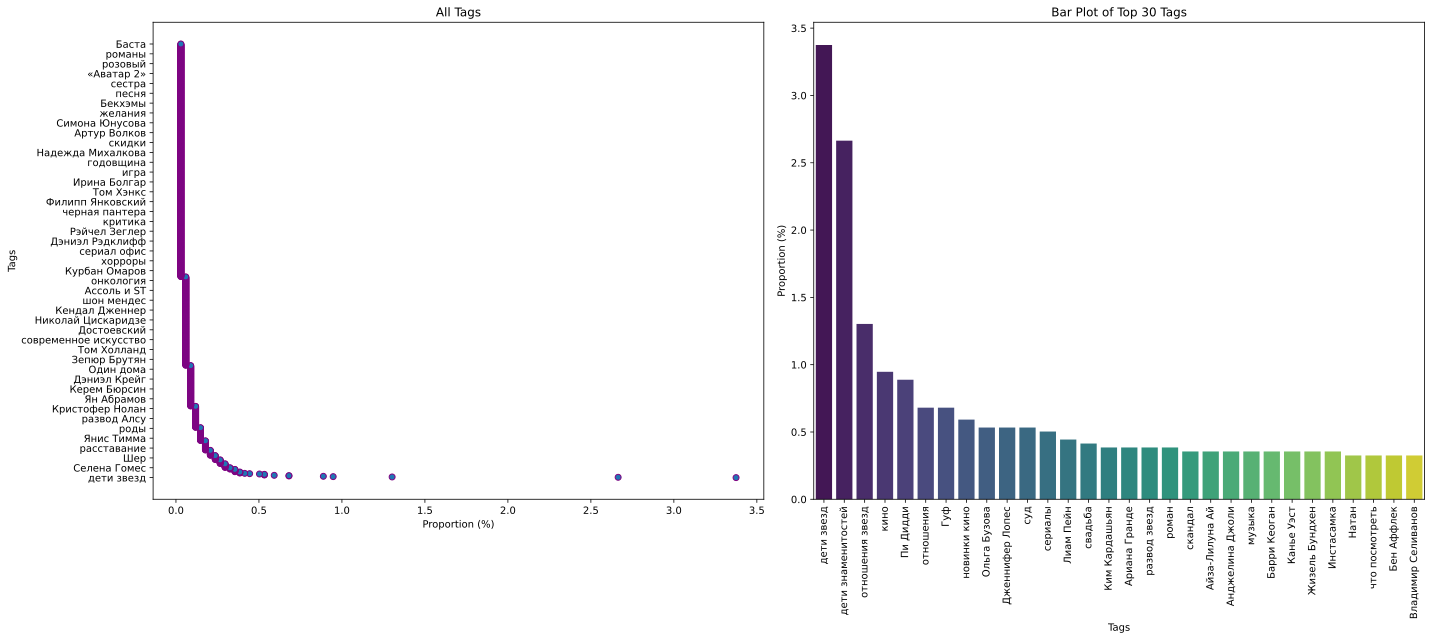

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = new_df_tags['proportion'].values
y = new_df_tags['tags'].values

fig, axs = plt.subplots(1, 2, figsize=(20, 9), dpi=300)

axs[0].set_title('All Tags')
axs[0].scatter(x, y, edgecolor='purple')
axs[0].set_xlabel("Proportion (%)")  # делать название на русском -вайб
axs[0].set_ylabel("Tags")
axs[0].set_yticks(range(0, len(y), 30))  # так как тэгов оооочень много на ось У я вывожу каждый 30 тэг
axs[0].set_yticklabels(y[::30], rotation=0)



sns.barplot(x=new_df_tags['tags'][:30], y=new_df_tags['proportion'][:30], palette="viridis", ax=axs[1])  # для репрезентативности беру топ-30 популярных тэгов
axs[1].set_title('Bar Plot of Top 30 Tags')
axs[1].set_xlabel('Tags')
axs[1].set_ylabel('Proportion (%)')
axs[1].set_xticklabels(new_df_tags['tags'][:30], rotation=90)


plt.tight_layout()
plt.show()

Что мы видим:
- как мы видим (по второму графику), около 6% тэгов - это тэги, связанные с детьми (дети звезд и дети знаменитостей). Это значит, что эти тэги встретились около 80 раз
- как мы видим (по первому графику), большинство тэгов встретились < 0,5%. Это указывает на то, все новости очень разные

### Анализ тэга 'pub_day', чтобы узнать в какие дни публиковалось больше новостей

In [ ]:
new_df_data = df['pub_day'].value_counts(normalize=True).reset_index()   # создаю отдельный датафрейм, по которому потом буду строить график
len(new_df_data)

36

In [ ]:
len(df)

1219

In [ ]:
new_df_data['proportion'] *= 100
round(new_df_data, 1)
new_df_data['number_of_articles'] = round(1219 // 100 * new_df_data['proportion'], 0)  # округляю для красоты результата
new_df_data.head()

,pub_day,proportion,number_of_articles
0,05 ноября,4.265792,51.0
1,30 октября,4.019688,48.0
2,13 ноября,4.019688,48.0
3,11 ноября,4.019688,48.0
4,29 октября,3.937654,47.0


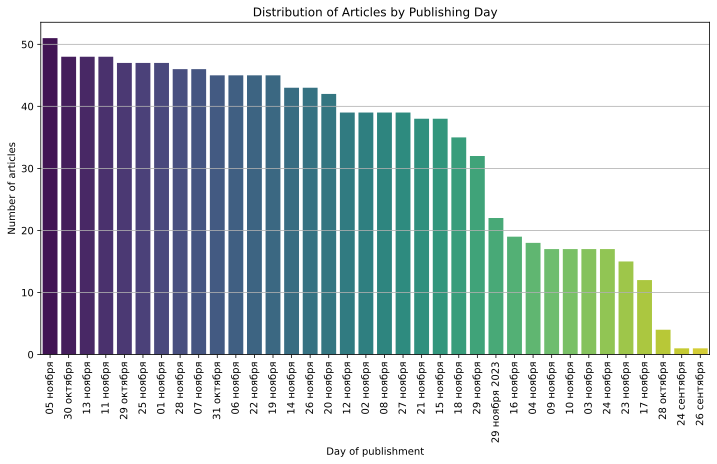

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='pub_day', y='number_of_articles', data=new_df_data, palette='viridis')
plt.title('Distribution of Articles by Publishing Day')
plt.xlabel('Day of publishment')
plt.ylabel('Number of articles')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Что мы видим:
- больше всего новостей было опубликовано 5 октября (из интересного, в этот день у Инстасамки дома был пожар и этому посвящено целых 3 новости)
- данные за 24 сентября и 26 сентября не репрезентативны, потому что они в мою выборку попали по разделу "самые популярные новости за год", то есть полноценно за эти дни новости не выгружались
- 29 ноября 2023: так как я краулила 29 ноября 2024, то в разделе "в этот день один год назад" отображались разные новости этого дня

In [ ]:
days_off = ['02 ноября', '03 ноября', '09 ноября', '10 ноября', '16 ноября', '17 ноября', '23 ноября', '24 ноября']

new_df_data['week_day'] = new_df_data['pub_day'].apply(lambda x: 'day off' if x in days_off else 'working day')

In [ ]:
new_df_data.head()

,pub_day,proportion,number_of_articles,week_day
0,05 ноября,4.265792,51.0,working day
1,30 октября,4.019688,48.0,working day
2,13 ноября,4.019688,48.0,working day
3,11 ноября,4.019688,48.0,working day
4,29 октября,3.937654,47.0,working day


week_day
day off         153.0
working day    1042.0
Name: number_of_articles, dtype: float64


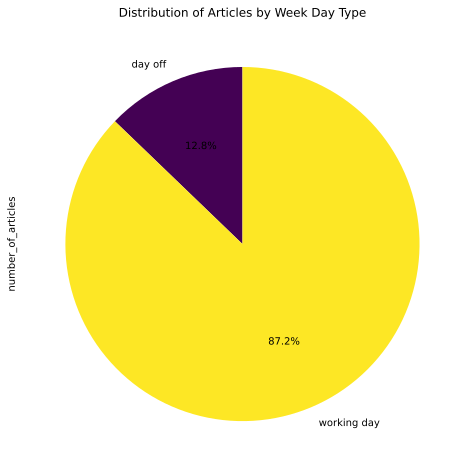

In [ ]:
summary = new_df_data.groupby('week_day')['number_of_articles'].sum()
print(summary)


plt.figure(figsize=(8, 8))
summary.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribution of Articles by Week Day Type')
plt.show()

Что мы видим:
- в выходные дни новостей публикуется стабильно меньше, чем в рабочие дни (примерно в 7 раз)

### Анализ тэга 'ner'

In [ ]:
df['ner'][0]

['oasis',
 'ноэля галлахера',
 'анаис',
 'daily mail',
 'англия',
 'анаис ноэль',
 'лондон',
 'oasis',
 'oasis',
 'великобритания',
 'ирландия',
 'европа',
 'the sun']

In [ ]:
df_ner_an = df[['title', 'ner']]

In [ ]:
df_ner_an = df_ner_an.reset_index(drop=True)
df_ner_an = df_ner_an.explode('ner')  # проворачиваю туже развертку списка, что и с 'tag'

In [ ]:
df_ner_an.head()

,title,ner
0,Ноэля Галлахера из Oasis сняли со старшей доче...,oasis
0,Ноэля Галлахера из Oasis сняли со старшей доче...,ноэля галлахера
0,Ноэля Галлахера из Oasis сняли со старшей доче...,анаис
0,Ноэля Галлахера из Oasis сняли со старшей доче...,daily mail
0,Ноэля Галлахера из Oasis сняли со старшей доче...,англия


In [ ]:
new_df_ner = df_ner_an['ner'].value_counts(normalize=True).reset_index()  # создаю отдельный датафрейм, по которому потом буду строить график

In [ ]:
new_df_ner = new_df_ner.sort_values(by='proportion', ascending=False)
new_df_ner['proportion'] *= 100

In [ ]:
len(new_df_ner)

3724

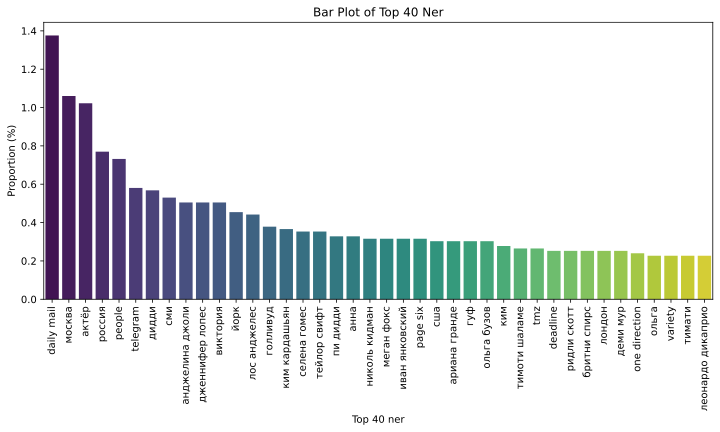

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x=new_df_ner['ner'][:40], y=new_df_ner['proportion'][:40], palette='viridis')
plt.title('Bar Plot of Top 40 Ner')
plt.xlabel('Top 40 ner')
plt.ylabel('Proportion (%)')
plt.xticks(new_df_ner['ner'][:40], rotation=90)  # опять у меня слишком много различных именованых сущностей, поэтому на графике отображены топ-40 именованых сущностей
plt.show()


Что мы видим:
- в новостях чаще всего ссылаются на daily mail (новостой канал про зарубежных звезд) и telegram
- вторая именованя сущность по популярности москва, потому что, практически, все события, связанные с отечественным шоубизнесом, проходят в москве
- за последний месяц больше в новостях people talk упоминялся пи дидди
- из отечественных звезд чаще всего упоминилась звезды с имененм викторя и анна


## Нахождение топ-5 ближайших слов к ключевым 🧢


### Подготовка данных

In [31]:
df.head()

,href,title,pub_day,full_text,tags,processed_text,keywords,ner
0,https://peopletalk.ru/article/noelya-gallahera...,Ноэля Галлахера из Oasis сняли со старшей доче...,29 ноября,Папарацци засняли музыканта группы Oasis Ноэля...,[],папарацци заснять музыкант группа oasis ноэля ...,"[тыс, музыкант, дочь]","[oasis, ноэля галлахера, анаис, daily mail, ан..."
2,https://peopletalk.ru/article/rezhissera-gladi...,Режиссера «Гладиатора 2» назвали ленивым и нет...,29 ноября,Оператор фильма «Гладиатор 2» Джон Мэтисон рас...,"['Гладиатор 2', 'Ридли Скотт']",оператор фильм гладиатор 2 джон мэтисон раскри...,"[скотт, гладиатор, ридли]","[джон мэтисон, ридли скотт, docfix, ридли скот..."
3,https://peopletalk.ru/article/redkie-foto-emma...,Редкие фото: Эмма Робертс показала подросшего ...,29 ноября,33-летняя Эмма Робертс не так часто делится с ...,"['дети звезд', 'Эмма Робертс']",33-летняя эмма робертс делиться поклонник ...,"[эмма, робертс, актриса]","[эмма робертс, эмма робертс, эмма робертс, код..."
4,https://peopletalk.ru/article/beremennaya-zhiz...,"Беременная Жизель Бундхен показала, как провел...",29 ноября,Беременная Жизель Бундхен в этом году забрала ...,"['дети звезд', 'Жизель Бундхен']",беременный жизель бундхен год забрать ребёнок ...,"[брэди, бундхен, жизель]","[том брэди, бенджамин, вивиан возлюбленным хоа..."
5,https://peopletalk.ru/article/sledy-ostavlenny...,"Следы, оставленные 1,5 млн лет назад в Африке,...",29 ноября,"Согласно исследованию, два вида древних людей,...","['археологи', 'Исследование', 'ученые']",Согласно исследование два вид древний человек ...,"[друга, друг, Вероятно]","[daily mail, двуногий примат, кевин, восточный..."


In [32]:
model_news.wv

In [33]:
df['keywords'][0]

['тыс', 'музыкант', 'дочь']

In [147]:
df_key_an = df[['title', 'keywords']]

In [148]:
df_key_an = df_key_an.reset_index(drop=True)
df_key_an = df_key_an.explode('keywords')  # опять разворачиваю список ключевых слов, чтобы на 1 строке было только 1 ключевое слово

In [122]:
df_key_an.head()

,title,keywords
0,Ноэля Галлахера из Oasis сняли со старшей доче...,тыс
0,Ноэля Галлахера из Oasis сняли со старшей доче...,музыкант
0,Ноэля Галлахера из Oasis сняли со старшей доче...,дочь
1,Режиссера «Гладиатора 2» назвали ленивым и нет...,скотт
1,Режиссера «Гладиатора 2» назвали ленивым и нет...,гладиатор


### Обучение rusvectors

In [37]:
import zipfile

urllib.request.urlretrieve('http://vectors.nlpl.eu/repository/20/180.zip', 'ruscorpora_upos_cbow_300_20_2019.zip')

src = 'ruscorpora_upos_cbow_300_20_2019.zip'

with zipfile.ZipFile(src, 'r') as zip_ref:
    zip_ref.extractall('.')


In [38]:
m = 'model.bin'
rusvectors = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

In [39]:
print(type(model_news))
print(type(rusvectors))

<class 'gensim.models.word2vec.Word2Vec'>
<class 'gensim.models.keyedvectors.KeyedVectors'>


In [40]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

In [149]:
def keywords_with_parts_of_speech(keywords):  # чтобы rusvectors сработало я все keywords привожу к формату типа ручей_NOUN
    annotated_keywords = []
    for keyword in df_key_an['keywords']:
       keyword = keyword.lower()

       parsed_word = morph.parse(keyword)[0]  # беру наиболее вероятный вариант части речи

       annotated_keywords.append(f"{keyword}_{parsed_word.tag.POS}")

    return annotated_keywords

df_key_an['annotated'] = keywords_with_parts_of_speech(df_key_an['keywords'])

print(df_key_an)

                                                  title    keywords  \
0     Ноэля Галлахера из Oasis сняли со старшей доче...         тыс   
0     Ноэля Галлахера из Oasis сняли со старшей доче...    музыкант   
0     Ноэля Галлахера из Oasis сняли со старшей доче...        дочь   
1     Режиссера «Гладиатора 2» назвали ленивым и нет...       скотт   
1     Режиссера «Гладиатора 2» назвали ленивым и нет...   гладиатор   
...                                                 ...         ...   
1217       Mona показала, как выглядела до популярности  джараховым   
1217       Mona показала, как выглядела до популярности      певица   
1218           Жизель Бундхен станет мамой в третий раз      жизель   
1218           Жизель Бундхен станет мамой в третий раз      хоаким   
1218           Жизель Бундхен станет мамой в третий раз      модель   

            annotated  
0            тыс_NOUN  
0       музыкант_NOUN  
0           дочь_NOUN  
1          скотт_NOUN  
1      гладиатор_NOUN  
...

#### всякие проверочки, которые не влияют на решение

In [124]:
words_in_rusvectors = rusvectors.key_to_index.keys()
words_in_rusvectors = list(rusvectors.key_to_index.keys())

print(f"Total words in rusvectors: {len(words_in_rusvectors)}")

print(list(words_in_rusvectors)[:10])

Total words in rusvectors: 189193
['так_ADV', 'быть_VERB', 'мочь_VERB', 'год_NOUN', 'человек_NOUN', 'xxxxxx_NUM', 'сказать_VERB', 'еще_ADV', 'один_NUM', 'говорить_VERB']


In [126]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
base_keywords = [morph.parse(keyword)[0].normal_form for keyword in df_key_an['keywords']]

In [ ]:
print(base_keywords)

['тыс', 'музыкант', 'дочь', 'скотт', 'гладиатор', 'ридлить', 'эмма', 'робертс', 'актриса', 'брэдить', 'бундхен', 'жизель', 'друг', 'друг', 'вероятно', 'народный', 'ноябрь', 'праздник', 'хейден', 'памела', 'разумеется', 'двойник', 'пол', 'конкурс', 'дидди', 'млн', 'доллар', 'флибуста', 'неделя', 'сообщить', 'звезда', 'универ', 'выглядеть', 'бритни', 'спирс', 'ролик', 'надвигаться', 'бесконечно', 'идеальный', 'смотреть', 'модель', 'джинсы', 'развод', 'бен', 'аффлек', 'виктория', 'антон', 'юмористка', 'анастасия', 'вместе', 'супруг', 'юлия', 'ответить', 'хейтер', 'ксения', 'собчак', 'сцена', 'экс', 'напомнить', 'первенец', 'петь', 'фильм', 'джонсон', 'мама', 'кэти', 'круз', 'волос', 'повод', 'хлой', 'конкурс', 'победитель', 'двойник', 'брюс', 'уиллис', 'уиллис', 'отсутствие', 'влечение', 'секс', 'мать', 'бывший', 'кристина', 'дочь', 'апрель', 'рэпер', 'проект', 'универ', 'звезда', 'радостный', 'новость', 'бизнесмен', 'группа', 'сергей', 'шнур', 'млн', 'прим', 'рубль', 'бузов', 'роль', 'ки

### Нахождение топ-5 ближайших по обученным моделям

In [127]:
def get_top_5_words(model, keyword, n=5):
    try:
        if isinstance(model, gensim.models.Word2Vec):
            return model.wv.most_similar(keyword, topn=n)  # т.к. model_news - gensim.models.Word2Vec
        elif isinstance(model, gensim.models.KeyedVectors):
            return model.most_similar(keyword, topn=n)  # т.к. rusvectors - gensim.models.KeyedVectors
    except KeyError:
        return []

In [130]:
results = []

for index, row in df_key_an.iterrows():
    keyword = row['keywords'].lower()
    annotated_keyword = row['annotated'] # не привожу к нижнему регистру, чтобы часть речи слова оставалась капсом

    top_word2vec = get_top_5_words(model_news, keyword)
    top_rusvectors = get_top_5_words(rusvectors, annotated_keyword)

    words_word2vec = [word for word, _ in top_word2vec]
    words_rusvectors = [word for word, _ in top_rusvectors]

    results.append({
        'keyword': keyword,
        'top_5_word2vec': words_word2vec,
        'top_5_rusvectors': words_rusvectors
    })



results_df = pd.DataFrame(results)
print(results_df)


         keyword                                     top_5_word2vec  \
0            тыс                                                 []   
1       музыкант      [дом, артист, говорить, момент, рассказывать]   
2           дочь               [ребёнок, сын, брак, два, отношение]   
3          скотт           [мир, женщина, режиссёр, шоу, вернуться]   
4      гладиатор      [вернуться, проект, режиссёр, часть, сняться]   
...          ...                                                ...   
3652  джараховым   [создатель, хью, подтвердить, впервые, касаться]   
3653      певица    [модель, девушка, артистка, решить, информация]   
3654      жизель       [октябрь, напомнить, модель, развод, москва]   
3655      хоаким  [жить, познакомиться, продолжать, отношение, к...   
3656      модель           [решить, певица, артистка, семья, слово]   

                                       top_5_rusvectors  
0     [долл_NOUN, 38,1_NUM, млн_NOUN, долловек_ADJ, ...  
1     [скрипач_NOUN, пианист_NO

In [138]:
results_df.head(20)

,keyword,top_5_word2vec,top_5_rusvectors
0,тыс,[],"[долл_NOUN, 38,1_NUM, млн_NOUN, долловек_ADJ, ..."
1,музыкант,"[дом, артист, говорить, момент, рассказывать]","[скрипач_NOUN, пианист_NOUN, певец_NOUN, оркес..."
2,дочь,"[ребёнок, сын, брак, два, отношение]","[дочь_VERB, сын_NOUN, племянница_NOUN, дочь_PR..."
3,скотт,"[мир, женщина, режиссёр, шоу, вернуться]",[]
4,гладиатор,"[вернуться, проект, режиссёр, часть, сняться]","[гладиаторский_ADJ, матадор_NOUN, патриций_NOU..."
5,ридли,"[режиссёр, мир, пол, звезда, образ]",[]
6,эмма,"[ноябрь, мир, работать, персонаж, продюсер]","[эмма_PROPN, александрина_PROPN, вера::сергеев..."
7,робертс,"[рассказать, женщина, марк, вернуться, думать]",[]
8,актриса,"[актёр, звезда, раз, новый, последний]","[артистка_NOUN, актриса_PROPN, певица_NOUN, ба..."
9,брэди,"[отец, ребёнок, напомнить, вместе, муж]",[]


In [139]:
def make_normal(annotated_words):  # привожу top_5_rusvectors к адекватному виду
    return [word.split('_')[0] for word in annotated_words]

results_df['top_5_rusvectors'] = results_df['top_5_rusvectors'].apply(make_normal)

In [140]:
results_df.head()

,keyword,top_5_word2vec,top_5_rusvectors
0,тыс,[],"[долл, 38,1, млн, долловек, 26,4]"
1,музыкант,"[дом, артист, говорить, момент, рассказывать]","[скрипач, пианист, певец, оркестрант, гитарист]"
2,дочь,"[ребёнок, сын, брак, два, отношение]","[дочь, сын, племянница, дочь, сестра]"
3,скотт,"[мир, женщина, режиссёр, шоу, вернуться]",[]
4,гладиатор,"[вернуться, проект, режиссёр, часть, сняться]","[гладиаторский, матадор, патриций, колизей, то..."


### Составляем список совпавших слов

In [141]:
results_common=[]
for index, row in df_key_an.iterrows(): # очень похожая функция на ту, которая уже была, но тут я ищу common_words = set(words_word2vec) & set(words_rusvectors)
    keyword = row['keywords'].lower()
    annotated_keyword = row['annotated']

    top_word2vec = get_top_n_words(model_news, keyword)
    top_rusvectors = get_top_n_words(rusvectors, annotated_keyword)

    words_word2vec = [word for word, _ in top_word2vec]
    words_rusvectors = make_normal([word for word, _ in top_rusvectors])

    common_words = set(words_word2vec) & set(words_rusvectors)


    results_common.append({
        'common_words': (' '.join(list(common_words)))
    })


results_df['common words'] = pd.Series(results_common)

In [160]:
results_df.head(100)

,keyword,top_5_word2vec,top_5_rusvectors,common words
0,тыс,[],"[долл, 38,1, млн, долловек, 26,4]",{'common_words': ''}
1,музыкант,"[дом, артист, говорить, момент, рассказывать]","[скрипач, пианист, певец, оркестрант, гитарист]",{'common_words': ''}
2,дочь,"[ребёнок, сын, брак, два, отношение]","[дочь, сын, племянница, дочь, сестра]",{'common_words': 'сын'}
3,скотт,"[мир, женщина, режиссёр, шоу, вернуться]",[],{'common_words': ''}
4,гладиатор,"[вернуться, проект, режиссёр, часть, сняться]","[гладиаторский, матадор, патриций, колизей, то...",{'common_words': ''}
...,...,...,...,...
95,рубль,"[доллар, млн, млрд, ред, 43]","[франк, доллар, копейка, руб[ль, рубловек]",{'common_words': 'доллар'}
96,бузов,"[ситуация, чёрный, звезда, девушка, фанат]",[],{'common_words': ''}
97,роль,"[сыграть, исполнить, фильм, сериал, играть]","[роль, функция, премьера, роля, амплуа]",{'common_words': ''}
98,кино,"[работа, мир, режиссёр, хороший, получить]","[фильм, кинематограф, кинофильм, кино, кинокар...",{'common_words': ''}


#### Небольшая статистика

In [143]:
x = len(results_df)
print(x)

3657


In [144]:
empty_common_words = {'common_words': ''}

# Фильтруем строки и считаем
y = results_df[results_df['common words'] != empty_common_words].shape[0]
print(y)

203


In [145]:
proportion = round(y / x * 100, 2)
print(f'% строк, в которых именованые сущности, найденные через word2vec, совпали с найденными через rusvectors = {proportion}%')

% строк, в которых именованые сущности, найденные через word2vec, совпали с найденными через rusvectors = 5.55%


Что мы тут видим:
- что только в 5% случаев есть совпадения между word2vec и rusvectors, это говорит о том, что какая-то модель обучена хуже
- если мы посмотрим на результаты, записанные в датафрейме, то увидим, что модель rusvectors справилась гораздо лучше (что и понятно, потому что она обучена на гораздо большем количестве текстов)
- также интересно, что модель rusvectors не находит похожих слов для имен зарубежных звезд, в то время как, модель word2vec с этой задачкой справляется
- в целом, по результатам word2vec видно на каких текстах она была обучена

### Смотрим на статьи, в которых есть общие ключевые слова

In [151]:
df_key_an.head()

,title,keywords,annotated
0,Ноэля Галлахера из Oasis сняли со старшей доче...,тыс,тыс_NOUN
0,Ноэля Галлахера из Oasis сняли со старшей доче...,музыкант,музыкант_NOUN
0,Ноэля Галлахера из Oasis сняли со старшей доче...,дочь,дочь_NOUN
1,Режиссера «Гладиатора 2» назвали ленивым и нет...,скотт,скотт_NOUN
1,Режиссера «Гладиатора 2» назвали ленивым и нет...,гладиатор,гладиатор_NOUN


In [208]:
merged_df = df_key_an.merge(results_df, left_on='keywords', right_on='keyword', how='left')  # делаю один сводный датафрейм

In [192]:
len(merged_df)

27582

In [209]:
merged_df =  merged_df.drop('common words', axis=1)

In [210]:
merged_df['top_5_word2vec'] = merged_df['top_5_word2vec'].apply(lambda x: str(x))  # в получившемся датафрейме много повторок, поэтому я его чищу
merged_df['top_5_rusvectors'] = merged_df['top_5_rusvectors'].apply(lambda x: str(x))
merged_df.drop_duplicates(inplace=True)

In [211]:
merged_df.drop(columns=['keyword'], inplace=True)  # удаляю столбец дубликат

In [196]:
merged_df.head()

,title,keywords,annotated,top_5_word2vec,top_5_rusvectors
0,Ноэля Галлахера из Oasis сняли со старшей доче...,тыс,тыс_NOUN,[],"['долл', '38,1', 'млн', 'долловек', '26,4']"
5,Ноэля Галлахера из Oasis сняли со старшей доче...,музыкант,музыкант_NOUN,"['дом', 'артист', 'говорить', 'момент', 'расск...","['скрипач', 'пианист', 'певец', 'оркестрант', ..."
10,Ноэля Галлахера из Oasis сняли со старшей доче...,дочь,дочь_NOUN,"['ребёнок', 'сын', 'брак', 'два', 'отношение']","['дочь', 'сын', 'племянница', 'дочь', 'сестра']"
28,Режиссера «Гладиатора 2» назвали ленивым и нет...,скотт,скотт_NOUN,"['мир', 'женщина', 'режиссёр', 'шоу', 'вернуть...",[]
35,Режиссера «Гладиатора 2» назвали ленивым и нет...,гладиатор,гладиатор_NOUN,"['вернуться', 'проект', 'режиссёр', 'часть', '...","['гладиаторский', 'матадор', 'патриций', 'коли..."


In [212]:
merged_df['keywords'] = merged_df['keywords'].apply(lambda x: [x])

df_exploded = merged_df.explode('keywords')

grouped = df_exploded.groupby('keywords')['title'].apply(list).reset_index()

print(grouped)

       keywords                                              title
0          Weaк  [Памела Андерсон объяснила, почему решила жить...
1          alba  [Мария Тарасова показала, как подарила Ирине Ш...
2         anikv  [Море и горы: Anikv поделилась отпускным видео...
3          anna  [Anna Karenina winter: особенности эстетики, с...
4          asap  [Рианна поделилась милыми снимками со своими с...
...         ...                                                ...
1625        яна  [Девушка Славы Копейкина дала редкий комментар...
1626     январь  [Показываем трейлер  фильма «Мой любимый дворт...
1627       янис  [Анна Седокова и Янис Тимма спровоцировали слу...
1628  янковский  [Интервью дня: Иван Янковский и Тихон Жизневск...
1629     ярушин  [Стас Ярушин показал первое фото с новорожденн...

[1630 rows x 2 columns]


In [217]:
grouped.head(100)

,keywords,title
0,Weaк,"[Памела Андерсон объяснила, почему решила жить..."
1,alba,"[Мария Тарасова показала, как подарила Ирине Ш..."
2,anikv,[Море и горы: Anikv поделилась отпускным видео...
3,anna,"[Anna Karenina winter: особенности эстетики, с..."
4,asap,[Рианна поделилась милыми снимками со своими с...
...,...,...
95,Прочь,[Звезда «Обители зла» Милла Йовович снимется в...
96,Пускай,"[Дмитрий Нагиев рассказал, с кем никогда не бу..."
97,Разумеется,[Шоу «Симпсоны» спустя 35 лет покидает «голос»...
98,Санга,[Пэрис Хилтон прямо ответила на вопрос о косме...


Что мы видим:
- есть такие ключевые слова, которые попадаются в больше чем одной статье (идеально, anna, видимо)
- как мне кажется, было бы эффективнее объединять статьи по именованым сущностям
- при таком делении возникаются неожиданные группы (из-за того, что, видимо, модель, которая вычленяла ключевые слова, не везде справилась со своей задачкой качественно)